# 01. 손실 곡선

In [62]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test)=keras.datasets.fashion_mnist.load_data()

from sklearn.model_selection import train_test_split

x_train_scaled = x_train / 255.0 # 정규화 과정
x_test_scaled = x_test / 255.0
x_train_scaled, x_val_scaled, y_train, y_val = train_test_split(x_train_scaled, y_train, test_size=0.2, random_state=42)

In [63]:
from keras.api._v2.keras import activations
def model_make(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28))) # 2D -> 1D
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer: # model_make 함수에 입력값이 있다면 아래를 실행
        model.add(a_layer)
  
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [64]:
model = model_make()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [66]:
h = model.fit(x_train_scaled, y_train, epochs=5, verbose=1)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5241 - accuracy: 0.8163
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3949 - accuracy: 0.8579
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3560 - accuracy: 0.8709
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3270 - accuracy: 0.8806
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3081 - accuracy: 0.8881


In [67]:
print(type(h))
print(h.history) # 딕샤너리 라서 key값으로 가져와야겠다 생각
print(h.history.keys())

<class 'keras.src.callbacks.History'>
{'loss': [0.5240947008132935, 0.3949033319950104, 0.35602498054504395, 0.3270372152328491, 0.30811607837677], 'accuracy': [0.8162916898727417, 0.8578749895095825, 0.8708750009536743, 0.8806458115577698, 0.8881041407585144]}
dict_keys(['loss', 'accuracy'])


<function matplotlib.pyplot.show(close=None, block=None)>

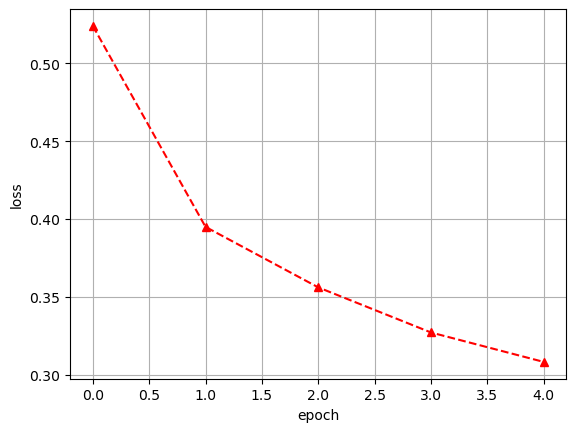

In [68]:
tlqkf = h.history['loss']

import matplotlib.pyplot as plt

plt.figure()
plt.plot(tlqkf, '--^', c='red')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

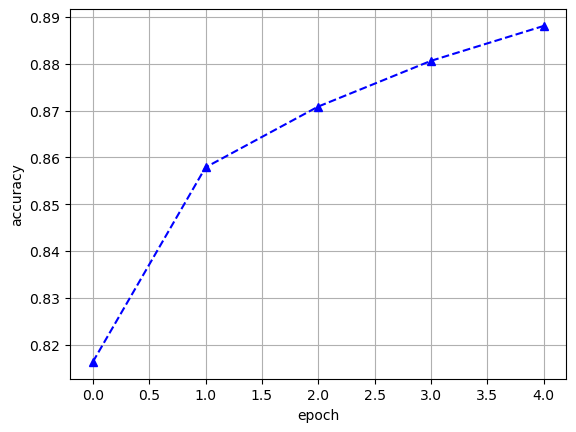

In [69]:
baba = h.history['accuracy']

import matplotlib.pyplot as plt

plt.figure()
plt.plot(baba, '--^', c='blue')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.show

# 02. 검증 손실

# 검증용 데이터가 필요한 이유
### 과대적합(Overfitting)
- 학습 데이터셋에서 점수가 좋았는데 시험 데이터셋에서 점수가 나쁘다면 모델이 학습 데이터셋에 과대적합 되었다고 한다.
- 학습 데이터셋에서 모델의 성능이 높게 측정되지만, 시험 데이터셋에서는 성능이 매우 낮게 측정됩니다.
- epoch가 너무 많아서 이제 정해진 답만 외워지게 됨 epoch가 어디시점에서 잘 학습된지를 찾아야함

### 검증셋
- 학습데이터에서 검증을해서 어느시점부터가 학습이 안되는지 찾는 과정

### 과소적합(Underfitting)
- 학습데이터셋보다 시험데이터셋의 점수가 높거나 두 점수가 모두 낮은 경우
- 즉 모델이 너무 단순하게 학습 데이터셋에 적절히 학습되지 않은 경우이다.
- 이런 경우 더 복잡한 모델을 사용해서 학습 데이터셋에서 잘 맞는 모델을 만들어야 한다.

In [70]:
# 딥러닝 모델 생성!

model = model_make()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # metrics 평가지표

In [71]:
h = model.fit(x_train_scaled, y_train, epochs=30, verbose=1,
             validation_data=(x_val_scaled, y_val))

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5330 - accuracy: 0.8120 - val_loss: 0.4526 - val_accuracy: 0.8317
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3921 - accuracy: 0.8590 - val_loss: 0.4125 - val_accuracy: 0.8525
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3553 - accuracy: 0.8712 - val_loss: 0.3761 - val_accuracy: 0.8683
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3314 - accuracy: 0.8805 - val_loss: 0.3789 - val_accuracy: 0.8651
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3158 - accuracy: 0.8863 - val_loss: 0.3729 - val_accuracy: 0.8717
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3037 - accuracy: 0.8911 - val_loss: 0.3642 - val_accuracy: 0.8777
Epoch 7/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2967 - accuracy: 0.8951 - val_loss: 0.3565 - val_accuracy:

In [72]:
print(h.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [73]:
a1 = h.history['loss']
a2 = h.history['val_loss']

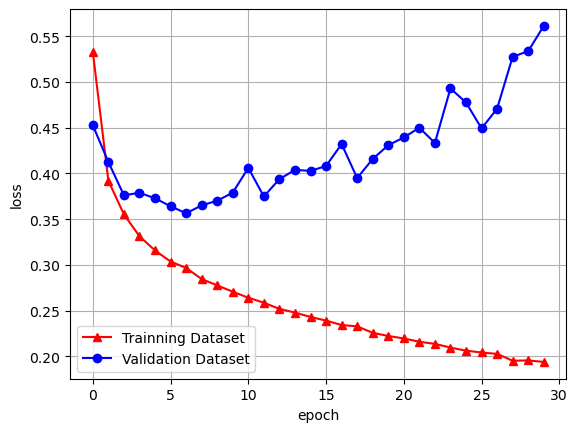

In [74]:
plt.figure()
plt.plot(a1, '-^', c='red' , label='Trainning Dataset')
plt.plot(a2, '-o', c='blue', label='Validation Dataset')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

In [75]:
score = model.evaluate(x_test_sclaed, y_test)

print(type(score))

313/313 [==============================] - 1s 2ms/step - loss: 0.5905 - accuracy: 0.8688
<class 'list'>


In [76]:
print(f'시험용 데이터셋의 Loss : {score[0]}')
print(f'시험용 데이터셋의 Accuracy : {score[1]}')

시험용 데이터셋의 Loss : 0.5904821157455444
시험용 데이터셋의 Accuracy : 0.8687999844551086


# 03. 드롭아웃
- 과대적합 문제를 완하 하거나 해결(일부 뉴런을 랜덤하게 꺼서 과대적합을 막기 -> 랜덤하게 뉴런선택)

In [77]:
model = model_make(keras.layers.Dropout(0.3)) # 30 %의 뉴런을 학습 시키지 않겠다!!
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
import tensorflow as tf

tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [79]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [80]:
h = model.fit(x_train_scaled, y_train, epochs=20, verbose=2,
             validation_data=(x_val_scaled, y_val))

Epoch 1/20
1500/1500 - 6s - loss: 0.5883 - accuracy: 0.7924 - val_loss: 0.4326 - val_accuracy: 0.8477 - 6s/epoch - 4ms/step
Epoch 2/20
1500/1500 - 5s - loss: 0.4411 - accuracy: 0.8409 - val_loss: 0.3964 - val_accuracy: 0.8547 - 5s/epoch - 3ms/step
Epoch 3/20
1500/1500 - 5s - loss: 0.4060 - accuracy: 0.8530 - val_loss: 0.3724 - val_accuracy: 0.8676 - 5s/epoch - 3ms/step
Epoch 4/20
1500/1500 - 5s - loss: 0.3829 - accuracy: 0.8618 - val_loss: 0.3693 - val_accuracy: 0.8627 - 5s/epoch - 3ms/step
Epoch 5/20
1500/1500 - 5s - loss: 0.3680 - accuracy: 0.8637 - val_loss: 0.3450 - val_accuracy: 0.8734 - 5s/epoch - 3ms/step
Epoch 6/20
1500/1500 - 5s - loss: 0.3561 - accuracy: 0.8710 - val_loss: 0.3394 - val_accuracy: 0.8767 - 5s/epoch - 3ms/step
Epoch 7/20
1500/1500 - 5s - loss: 0.3456 - accuracy: 0.8716 - val_loss: 0.3268 - val_accuracy: 0.8789 - 5s/epoch - 3ms/step
Epoch 8/20
1500/1500 - 5s - loss: 0.3378 - accuracy: 0.8744 - val_loss: 0.3493 - val_accuracy: 0.8725 - 5s/epoch - 4ms/step
Epoch 9/

In [81]:
b1 = h.history['loss']
b2 = h.history['val_loss']

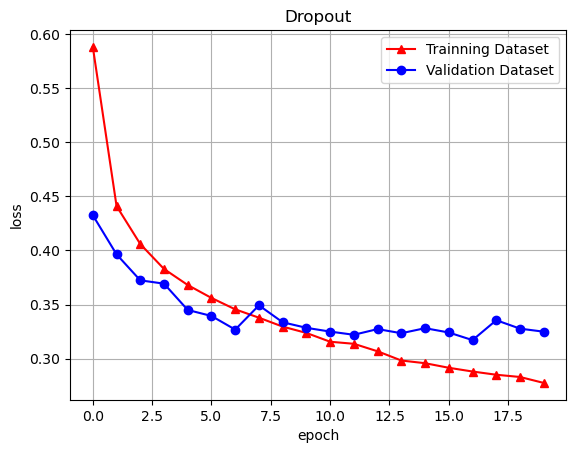

In [82]:
plt.figure()
plt.plot(b1, '-^', c='red' , label='Trainning Dataset')
plt.plot(b2, '-o', c='blue', label='Validation Dataset')
plt.title('Dropout')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

# 04. 모델 저장과 복원

In [83]:
# A
model.save_weights('happy.h5') # save: 저장하다, weights: 가중치(기울기)

In [84]:
# B
model.save('apple.h5')

C:\Users\baesuhan\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [143]:
# A~~~
model = model_make(keras.layers.Dropout(0.3))

model.load_weights('happy.h5')

In [144]:
import numpy as np
y_pred = model.predict(x_test_scaled)
print(y_pred.shape)

313/313 [==============================] - 0s 1ms/step
(10000, 10)


In [145]:
print(y_pred[0, :])

[3.0411222e-11 1.3141499e-14 5.1426741e-15 4.1583607e-12 1.2923691e-12
 3.0342632e-03 3.1796735e-11 5.1299385e-03 3.0778932e-10 9.9183577e-01]


In [146]:
# 축 (axis) axis= 1 이면 행의 최댓값의 인덱스 선택
# axis = 0 이면 열의 최댓값의 인덱스 선택    
y_pred = np.argmax(y_pred, axis=1)

print(y_pred)

[9 2 1 ... 8 1 5]


In [147]:
# 정답 데이터: y_test

www = y_pred == y_test # True: 1, False: 0 같으면 True 다르면 False

print(np.sum(www) / www.shape[0])
print(np.mean(www))

print('정확도(%%): %.2f%%' % (100 * np.mean(www)))

0.8793
0.8793
정확도(%): 87.93%


In [148]:
model2 = keras.models.load_model('apple.h5')

score = model2.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3559 - accuracy: 0.8793


# 05. 콜백
- 매 에포크마다 학습한거를 저장하기 위해서 사용 저장한거에서 학습률이 잘된거를 찾아서 사용
- 조기종료를 위한 콜백은 학습 에포크 횟수를 제공하는 역활이지만 모델이 과대적합되는 것을 막아줌
- epoch를 300으로 지정하고 100번 이후로 향상되지 않으면 종료
- ex) patience=2 지정하면 2번 연속 검증 점수가 향상되지 않으면 학습을 중지

In [168]:
model = model_make(keras.layers.Dropout(0.3))

In [169]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [170]:
# 가장 좋았었던 epoch(학습)를 저장
cb = keras.callbacks.ModelCheckpoint('best_model2.h5', save_best_only=True)

In [171]:
# 조기종료를 위한 콜백
es = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # restore_best_weights=True 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.

In [172]:
h = model.fit(x_train_scaled, y_train, epochs=50, verbose=2,
             validation_data=(x_val_scaled, y_val),
             callbacks=[cb,es])

Epoch 1/50
1500/1500 - 6s - loss: 0.5907 - accuracy: 0.7906 - val_loss: 0.4257 - val_accuracy: 0.8441 - 6s/epoch - 4ms/step
Epoch 2/50
1500/1500 - 5s - loss: 0.4380 - accuracy: 0.8425 - val_loss: 0.4001 - val_accuracy: 0.8533 - 5s/epoch - 3ms/step
Epoch 3/50
1500/1500 - 5s - loss: 0.4017 - accuracy: 0.8547 - val_loss: 0.3606 - val_accuracy: 0.8669 - 5s/epoch - 3ms/step
Epoch 4/50
1500/1500 - 5s - loss: 0.3802 - accuracy: 0.8615 - val_loss: 0.3639 - val_accuracy: 0.8671 - 5s/epoch - 3ms/step
Epoch 5/50
1500/1500 - 5s - loss: 0.3661 - accuracy: 0.8653 - val_loss: 0.3568 - val_accuracy: 0.8681 - 5s/epoch - 3ms/step
Epoch 6/50
1500/1500 - 5s - loss: 0.3535 - accuracy: 0.8688 - val_loss: 0.3537 - val_accuracy: 0.8702 - 5s/epoch - 3ms/step
Epoch 7/50
1500/1500 - 5s - loss: 0.3459 - accuracy: 0.8730 - val_loss: 0.3350 - val_accuracy: 0.8763 - 5s/epoch - 3ms/step
Epoch 8/50
1500/1500 - 5s - loss: 0.3370 - accuracy: 0.8765 - val_loss: 0.3309 - val_accuracy: 0.8811 - 5s/epoch - 3ms/step
Epoch 9/

In [174]:
print(es.stopped_epoch) # 몇번 에포크에서 가장 좋았는지 확인

9


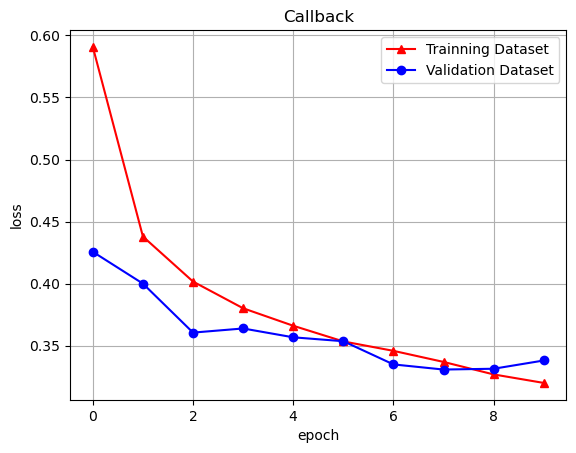

In [175]:
b1 = h.history['loss']
b2 = h.history['val_loss']

plt.figure()
plt.plot(b1, '-^', c='red' , label='Trainning Dataset')
plt.plot(b2, '-o', c='blue', label='Validation Dataset')
plt.title('Callback')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()